# 📊 Bivariate Analysis: State-Level Patterns

**Objective**: Analyze relationships between two variables—primarily geographic (state) and activity metrics.

**Key Questions**:
- Which states have the highest demographic update activity?
- How do enrollment patterns vary across states?
- Are there regional disparities in Aadhaar adoption and maintenance?

---

## 1️⃣ Environment Setup & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings

warnings.filterwarnings('ignore')

# Set professional styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 11

# Ensure output directory exists
os.makedirs('../outputs/charts', exist_ok=True)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


In [2]:
# Load and prepare all datasets (independent of other notebooks)
print("📁 Loading Enrollment data...")
enrol = pd.concat([pd.read_csv(f) for f in glob.glob("../data/enrollment/*.csv")], ignore_index=True)
enrol['date'] = pd.to_datetime(enrol['date'], errors='coerce', dayfirst=True)
enrol = enrol.dropna(subset=['date'])
print(f"   ✅ Loaded {len(enrol):,} enrollment records")

print("📁 Loading Demographic data...")
demo = pd.concat([pd.read_csv(f) for f in glob.glob("../data/demographic/*.csv")], ignore_index=True)
demo['date'] = pd.to_datetime(demo['date'], errors='coerce', dayfirst=True)
demo = demo.dropna(subset=['date'])
print(f"   ✅ Loaded {len(demo):,} demographic records")

print("📁 Loading Biometric data...")
bio = pd.concat([pd.read_csv(f) for f in glob.glob("../data/biometric/*.csv")], ignore_index=True)
bio['date'] = pd.to_datetime(bio['date'], errors='coerce', dayfirst=True)
bio = bio.dropna(subset=['date'])
print(f"   ✅ Loaded {len(bio):,} biometric records")

📁 Loading Enrollment data...


   ✅ Loaded 1,006,029 enrollment records
📁 Loading Demographic data...


   ✅ Loaded 2,071,700 demographic records
📁 Loading Biometric data...


   ✅ Loaded 1,861,108 biometric records


---

## 2️⃣ State × Demographic Update Heatmap

Visualizing the relationship between states and demographic update intensity across age groups.

In [3]:
# Aggregate demographic updates by state
state_demo = demo.groupby('state')[['demo_age_5_17', 'demo_age_17_']].sum()

# Rename columns for clarity
state_demo.columns = ['Age 5-17', 'Age 17+']

# Sort by total updates (descending) and take top 20 states
state_demo['Total'] = state_demo.sum(axis=1)
state_demo = state_demo.sort_values('Total', ascending=False).head(20)
state_demo = state_demo.drop(columns=['Total'])

print(f"📊 Top 20 States by Demographic Update Volume:")
print(state_demo)

📊 Top 20 States by Demographic Update Volume:


                Age 5-17  Age 17+
state                            
Uttar Pradesh     790308  7752020
Maharashtra       273322  4781280
Bihar             380023  4434327
West Bengal       242549  3629623
Madhya Pradesh    407098  2505840
Rajasthan         257224  2560391
Andhra Pradesh    321143  1974362
Tamil Nadu        315638  1896590
Chhattisgarh      165207  1840227
Gujarat           208474  1615853
Karnataka         264981  1430304
Telangana         242259  1387649
Delhi             175535  1263399
Jharkhand          99376  1301813
Haryana           139314  1026826
Odisha            145643   937594
Assam              84480   928098
Punjab             56866   825029
Kerala             61064   683888
Uttarakhand        49926   413711


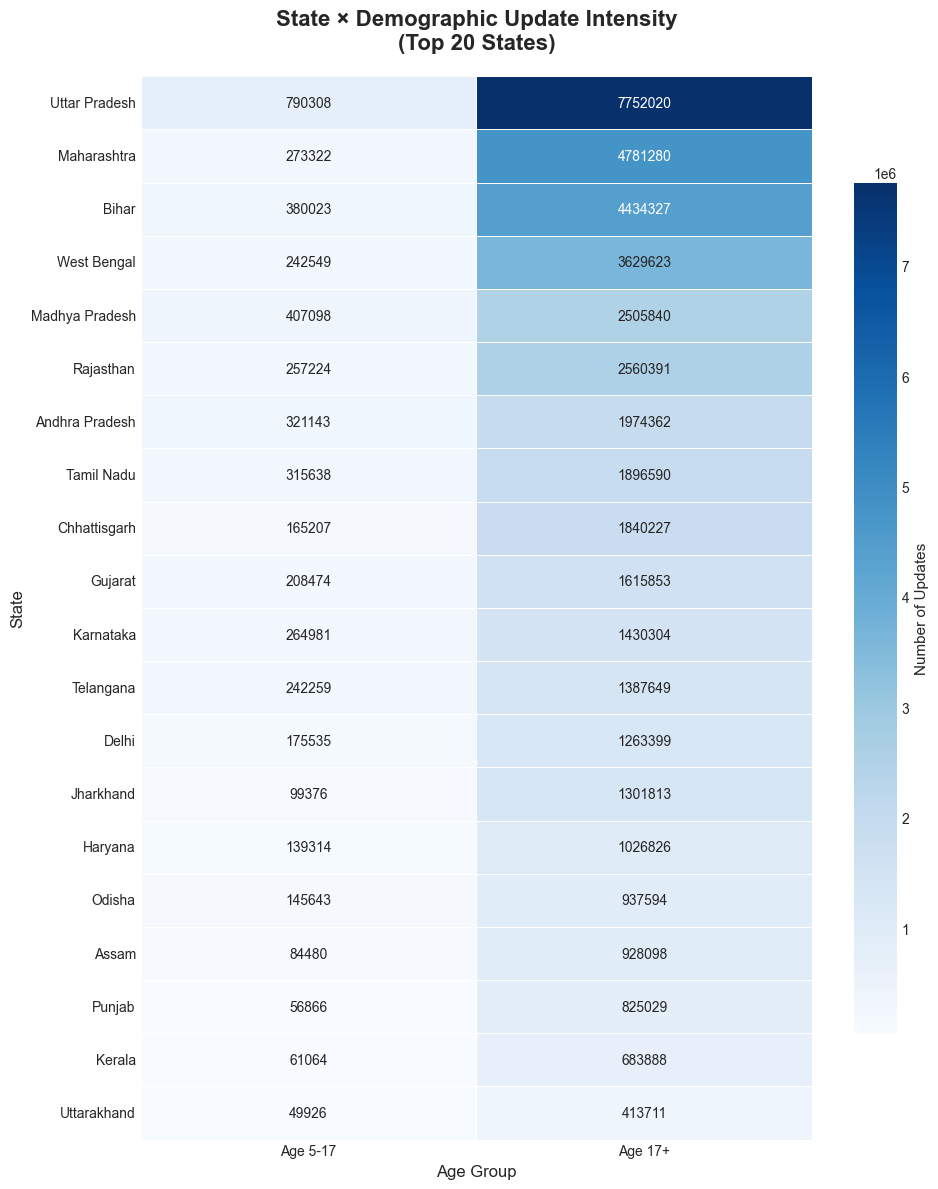


✅ Chart saved: outputs/charts/state_demographic_heatmap.png


In [4]:
# Create heatmap
fig, ax = plt.subplots(figsize=(10, 12))

# Use Blues colormap for government-friendly appearance
sns.heatmap(
    state_demo,
    cmap='Blues',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Number of Updates', 'shrink': 0.8},
    ax=ax
)

ax.set_title('State × Demographic Update Intensity\n(Top 20 States)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('State', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('../outputs/charts/state_demographic_heatmap.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Chart saved: outputs/charts/state_demographic_heatmap.png")

### 📋 Insight: State-Level Demographic Update Patterns

> **Finding**: Large population states (Uttar Pradesh, Maharashtra, Bihar, Madhya Pradesh) predictably show the highest demographic update volumes. However, the intensity patterns reveal that adult (17+) updates dominate across all states, confirming the univariate analysis finding.

> **Policy Implication**: States with high update volumes may benefit from additional enrollment center capacity or enhanced digital update infrastructure. Regional disparities in update volumes may also reflect differences in Aadhaar utilization for government services.

---

## 3️⃣ State × Enrollment Comparison

Comparing total enrollments across states with age group breakdown.

In [5]:
# Aggregate enrollments by state
state_enrol = enrol.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

# Rename columns
state_enrol.columns = ['Age 0-5', 'Age 5-17', 'Age 18+']

# Calculate total and sort
state_enrol['Total'] = state_enrol.sum(axis=1)
state_enrol = state_enrol.sort_values('Total', ascending=True).tail(15)  # Top 15 for visualization

print(f"📊 Top 15 States by Total Enrollment:")
print(state_enrol[['Total']].sort_values('Total', ascending=False))

📊 Top 15 States by Total Enrollment:
                  Total
state                  
Uttar Pradesh   1018629
Bihar            609585
Madhya Pradesh   493970
West Bengal      375297
Maharashtra      369139
Rajasthan        348458
Gujarat          280549
Assam            230197
Karnataka        223235
Tamil Nadu       220789
Jharkhand        157539
Telangana        131574
Andhra Pradesh   127681
Odisha           118837
Meghalaya        109771


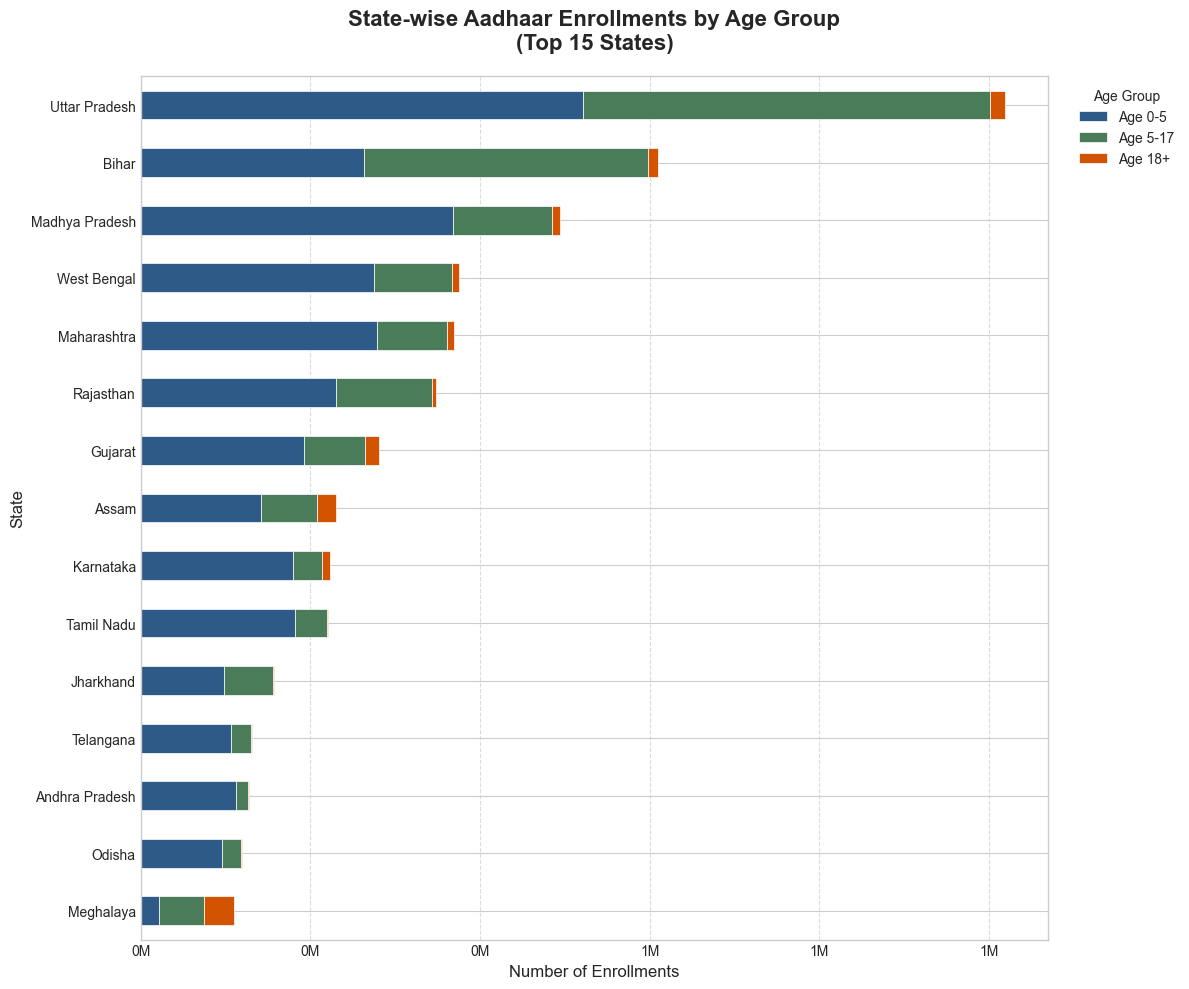


✅ Chart saved: outputs/charts/state_enrollment_comparison.png


In [6]:
# Create horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))

# Colors for age groups
colors = ['#2E5A87', '#4A7C59', '#D35400']

state_enrol[['Age 0-5', 'Age 5-17', 'Age 18+']].plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor='white',
    linewidth=0.5
)

ax.set_title('State-wise Aadhaar Enrollments by Age Group\n(Top 15 States)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Number of Enrollments', fontsize=12)
ax.set_ylabel('State', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Move legend outside
ax.legend(title='Age Group', bbox_to_anchor=(1.02, 1), loc='upper left')

ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../outputs/charts/state_enrollment_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Chart saved: outputs/charts/state_enrollment_comparison.png")

### 📋 Insight: State Enrollment Patterns

> **Finding**: Enrollment volumes correlate strongly with state population. Uttar Pradesh leads in absolute numbers due to its large population base. The age distribution within each state is relatively consistent, suggesting uniform enrollment policies across geographies.

> **Policy Implication**: Per-capita enrollment rates (not shown here) would provide a more meaningful comparison of Aadhaar penetration. States with lower per-capita enrollment may require targeted awareness campaigns or additional enrollment infrastructure.

---

## 4️⃣ State × Biometric Update Comparison

In [7]:
# Aggregate biometric updates by state
state_bio = bio.groupby('state')[['bio_age_5_17', 'bio_age_17_']].sum()

# Rename columns
state_bio.columns = ['Age 5-17 (Biometric)', 'Age 17+ (Biometric)']

# Calculate total and sort
state_bio['Total'] = state_bio.sum(axis=1)
state_bio = state_bio.sort_values('Total', ascending=False).head(15)

# Calculate child proportion
state_bio['Child_Proportion'] = state_bio['Age 5-17 (Biometric)'] / state_bio['Total'] * 100

print(f"📊 Top 15 States by Biometric Update Volume:")
print(state_bio[['Total', 'Child_Proportion']].round(1))

📊 Top 15 States by Biometric Update Volume:
                  Total  Child_Proportion
state                                    
Uttar Pradesh   9577735              64.8
Maharashtra     9226139              38.1
Madhya Pradesh  5923771              54.0
Bihar           4897587              45.1
Tamil Nadu      4698117              47.4
Rajasthan       3994955              51.7
Andhra Pradesh  3714592              60.3
Gujarat         3196514              45.7
Chhattisgarh    2648729              33.4
Karnataka       2635954              47.2
West Bengal     2524448              41.2
Odisha          2402827              49.9
Jharkhand       2026297              43.3
Punjab          1739671              40.2
Telangana       1737654              54.5


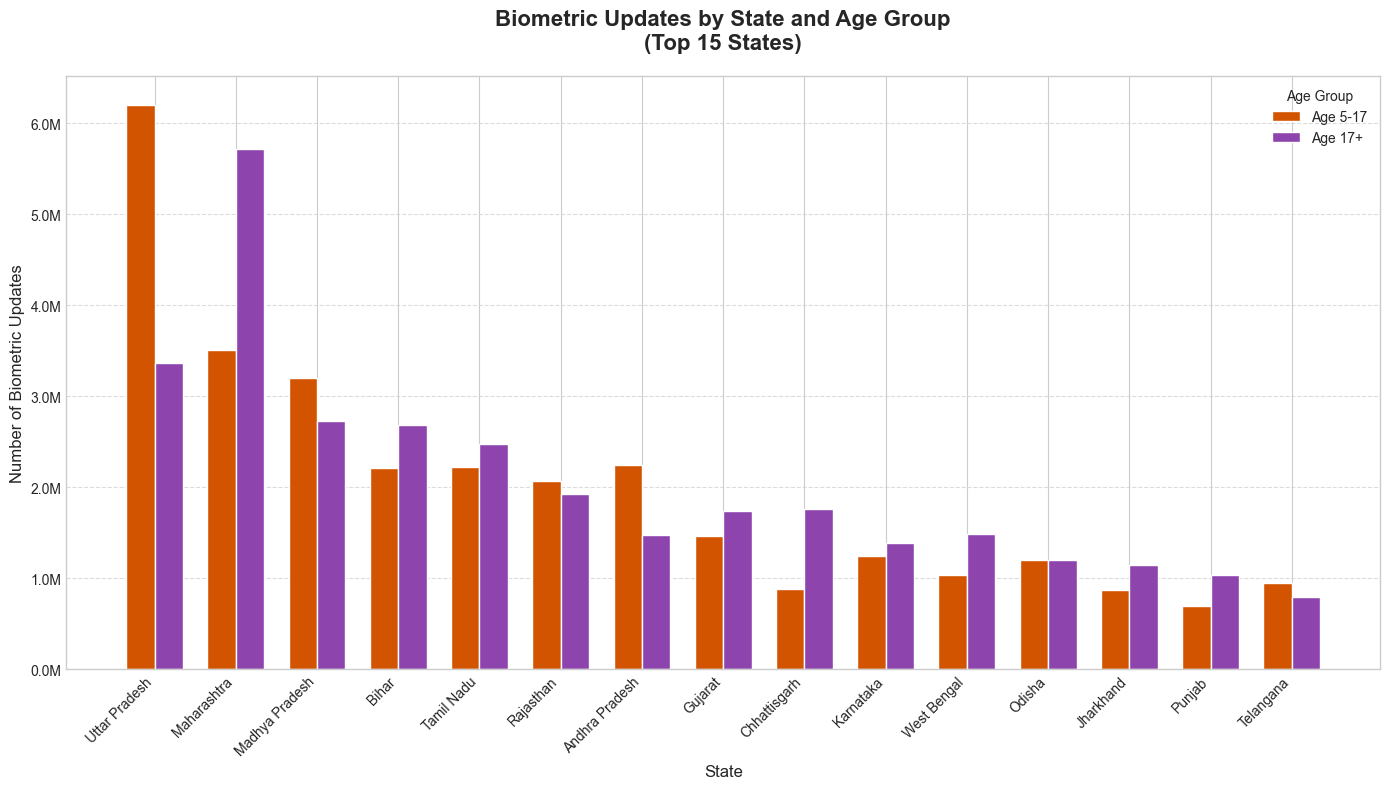


✅ Chart saved: outputs/charts/state_biometric_comparison.png


In [8]:
# Create grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))

x = range(len(state_bio))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], state_bio['Age 5-17 (Biometric)'], width, 
               label='Age 5-17', color='#D35400', edgecolor='white')
bars2 = ax.bar([i + width/2 for i in x], state_bio['Age 17+ (Biometric)'], width,
               label='Age 17+', color='#8E44AD', edgecolor='white')

ax.set_title('Biometric Updates by State and Age Group\n(Top 15 States)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of Biometric Updates', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(state_bio.index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax.legend(title='Age Group')

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('../outputs/charts/state_biometric_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ Chart saved: outputs/charts/state_biometric_comparison.png")

### 📋 Insight: State Biometric Update Patterns

> **Finding**: Biometric update patterns by state show that child biometric updates (Age 5-17) constitute a significant proportion—sometimes exceeding 30%—of total biometric updates. This reflects the mandatory biometric refresh policy for growing children.

> **Policy Implication**: States with high child biometric update volumes may have implemented effective school-based biometric refresh programs. Best practices from high-performing states could be replicated in regions with lower child update rates.

---

## 📋 Summary: Bivariate Analysis Key Takeaways

| Analysis | Key Finding | Policy Relevance |
|----------|-------------|------------------|
| **State × Demo Updates** | Large states dominate volumes; adult updates prevalent | Capacity planning for enrollment centers |
| **State × Enrollments** | Enrollment correlates with population | Per-capita rates needed for penetration analysis |
| **State × Bio Updates** | Significant child biometric refresh activity | School-based programs appear effective |

### Charts Generated:
1. `outputs/charts/state_demographic_heatmap.png`
2. `outputs/charts/state_enrollment_comparison.png`
3. `outputs/charts/state_biometric_comparison.png`

In [9]:
print("\n" + "="*60)
print("✅ BIVARIATE ANALYSIS COMPLETE")
print("="*60)
print("\n📁 Charts saved to: outputs/charts/")
print("   - state_demographic_heatmap.png")
print("   - state_enrollment_comparison.png")
print("   - state_biometric_comparison.png")


✅ BIVARIATE ANALYSIS COMPLETE

📁 Charts saved to: outputs/charts/
   - state_demographic_heatmap.png
   - state_enrollment_comparison.png
   - state_biometric_comparison.png
